<a href="https://colab.research.google.com/github/santisf/datascience_coder/blob/main/clase_04_teorica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Micro challenge

Hacer un grafico de lineas para los siguientes:
- EU_Sales
- JP_Sales
- Other_Sales

*Teniendo en cuenta el axis Year_of_Release y por Developer*

In [ ]:
url_video_games:str = r"https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/Video_Games.csv"
video_games_df = pd.read_csv(url_video_games)


- *Completitud* : No nulls
- *Exactitud* :
    * No sean ambigüos, que sean correctos( no existan valores fuera de norma)
    * ISO 8601 --> "March 4, 2025" -> %Y-%m-%d.
    * Data duplicada() -->>> Jamas debe pasar.

In [ ]:
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
video_games_df.isna().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


# Conteo de nulls

In [ ]:
def mostrar_perc_nulls(df:pd.DataFrame) ->  pd.DataFrame:

    total_filas = len(df)
    nulos = df.isna().sum()
    percentage = (nulos / total_filas) * 100

    resumen = pd.DataFrame(
        {
            "columna": nulos.index,
            "nulos": nulos.values,
            "percentage": percentage.values.round(2)
        }
    )

    return resumen.reset_index(drop=True).sort_values(by="percentage", ascending=False)



In [ ]:
mostrar_perc_nulls(video_games_df)

,columna,nulos,percentage
13,User_Count,9129,54.60
11,Critic_Count,8582,51.33
10,Critic_Score,8582,51.33
15,Rating,6769,40.49
12,User_Score,6704,40.10
14,Developer,6623,39.61
2,Year_of_Release,269,1.61
4,Publisher,54,0.32
0,Name,2,0.01
3,Genre,2,0.01


*Duplicados*
- Hacer una funcion que me permita ver los datos duplicados

In [ ]:
# suponiendo que tengo dos columnas como PK's
subset_pk:list[str] = ["Name","Platform"]
video_games_df.duplicated(subset=subset_pk).sum()


np.int64(5)

In [ ]:
video_games_df.duplicated().sum()

np.int64(0)

In [ ]:
# transformar el año en tipo fecha

video_games_df["Year_of_Release"] = pd.to_datetime(video_games_df.Year_of_Release, format="%Y")


In [ ]:
# video_games_df["Year_of_Release"] =
video_games_df[video_games_df.Year_of_Release.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaT,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaT,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaT,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
moda_fecha = video_games_df["Year_of_Release"].mode()

In [ ]:
# video_games_df["Year_of_Release"]= video_games_df["Year_of_Release"].fillna(moda_fecha)

In [ ]:
video_games_df["Year_of_Release"] = video_games_df["Year_of_Release"].fillna(method="ffill")

/tmp/ipython-input-573948938.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  video_games_df["Year_of_Release"] = video_games_df["Year_of_Release"].fillna(method="ffill")


In [ ]:
# video_games_df.iloc[16376]

In [ ]:
mostrar_perc_nulls(video_games_df)

,columna,nulos,percentage
13,User_Count,9129,54.60
11,Critic_Count,8582,51.33
10,Critic_Score,8582,51.33
15,Rating,6769,40.49
12,User_Score,6704,40.10
14,Developer,6623,39.61
4,Publisher,54,0.32
0,Name,2,0.01
3,Genre,2,0.01
7,JP_Sales,0,0.00


In [ ]:
# video_games_df["Developer"] = video_games_df.Developer.str.lower().str.replace("-"," ")

In [ ]:
def fill_na_by_publisher(row):
    if pd.isna(row["Developer"]): # ve si es null

        if row["Publisher"] in ["Atari", "Warner Bros. Interactive Entertainment"]: # analiza si el publisher es alguna de esas opciones
            return "Nintendo" # --> entonces me coloc como nintendo
        else:
            return "Appel Inc." # --> es apple

    return row["Developer"] # --> retorna esa transformacion

In [ ]:
# reemplazo condicional
video_games_df["Developer"] = video_games_df.apply(fill_na_by_publisher, axis=1)



In [ ]:
mostrar_perc_nulls(video_games_df)

,columna,nulos,percentage
13,User_Count,9129,54.60
11,Critic_Count,8582,51.33
10,Critic_Score,8582,51.33
15,Rating,6769,40.49
12,User_Score,6704,40.10
4,Publisher,54,0.32
3,Genre,2,0.01
0,Name,2,0.01
7,JP_Sales,0,0.00
6,EU_Sales,0,0.00


In [ ]:

## busqueda de los de mayores ventas
top_devs = (
    video_games_df.groupby("Developer")[["EU_Sales","JP_Sales","Other_Sales"]]
    .sum()
    .sum(axis=1)
    .nlargest(5)
    .index
)

In [ ]:
columnas_keep = ["Year_of_Release","Other_Sales","EU_Sales","JP_Sales","Developer"]

ventas_graficar_df = video_games_df[columnas_keep]
ventas_graficar_df = ventas_graficar_df[ventas_graficar_df["Developer"].isin(top_devs)]
ventas_graficar_df.head()

,Year_of_Release,Other_Sales,EU_Sales,JP_Sales,Developer
0,2006-01-01,8.45,28.96,3.77,Nintendo
1,1985-01-01,0.77,3.58,6.81,Appel Inc.
2,2008-01-01,3.29,12.76,3.79,Nintendo
3,2009-01-01,2.95,10.93,3.28,Nintendo
4,1996-01-01,1.00,8.89,10.22,Appel Inc.


In [ ]:
ventas_graficar_df = ventas_graficar_df.set_index("Year_of_Release").sort_index()

In [ ]:
ventas_graficar_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7173 entries, 1980-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Other_Sales  7173 non-null   float64
 1   EU_Sales     7173 non-null   float64
 2   JP_Sales     7173 non-null   float64
 3   Developer    7173 non-null   object 
dtypes: float64(3), object(1)
memory usage: 280.2+ KB


*Graficar este challenge por los graficos de linea*

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
regiones = ["EU_Sales", "JP_Sales", "Other_Sales"]

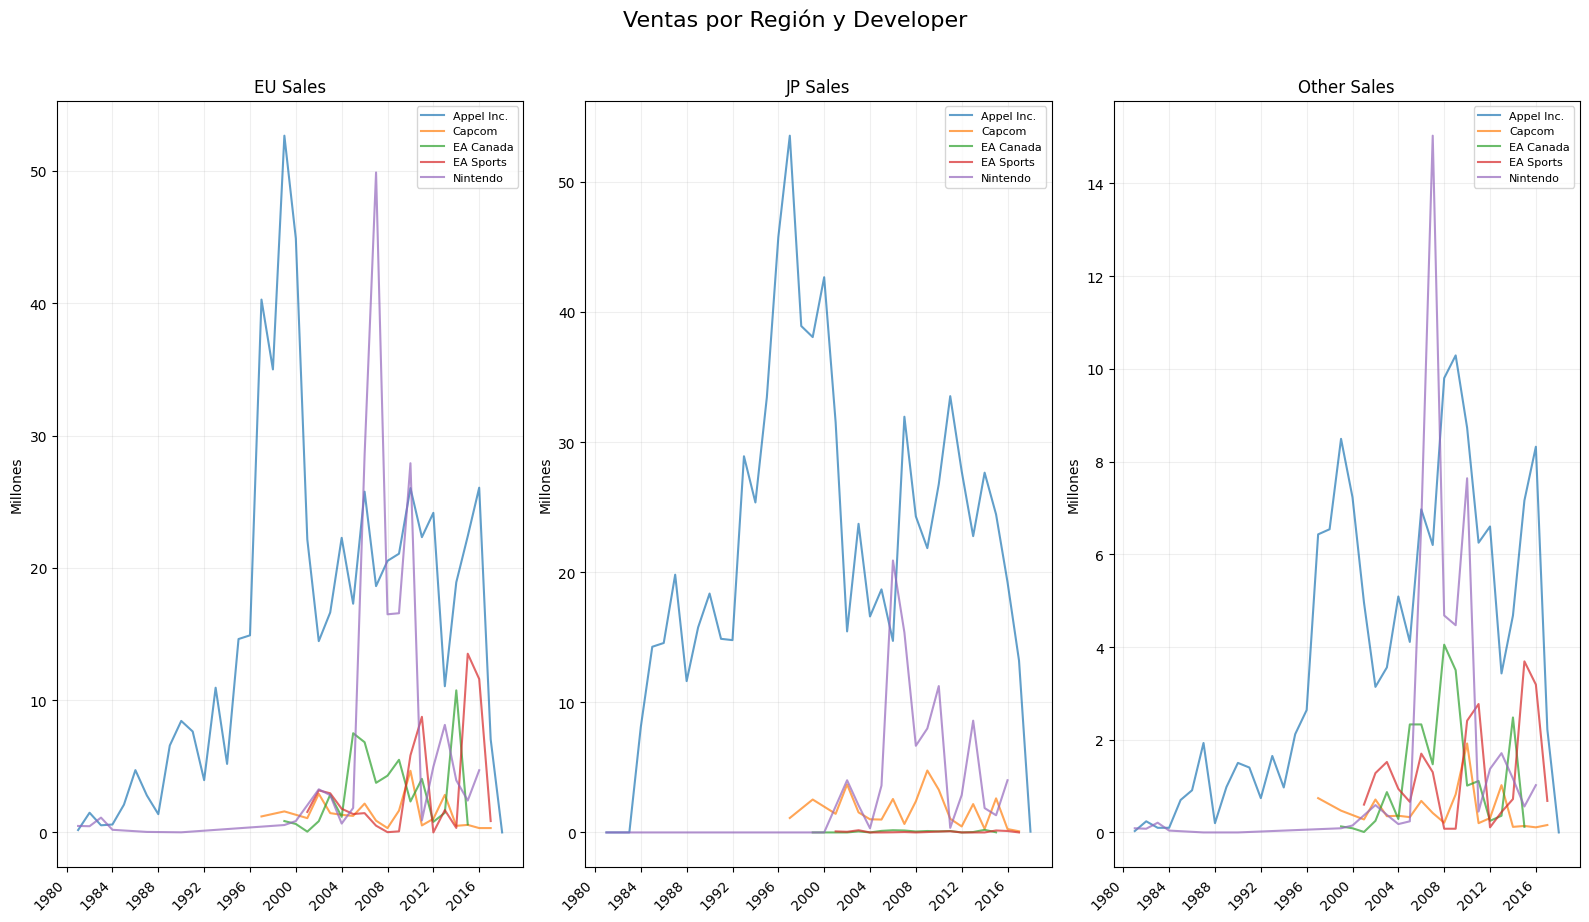

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 9))

# Agrupamos por Developer y Year_of_Release

ventas_resampled =(
    ventas_graficar_df
    .groupby(["Developer", pd.Grouper(freq="YE")])[regiones]
    .sum()
    .reset_index()
)

for ax, region in zip(axes, regiones):
    for dev, grupo in ventas_resampled.groupby("Developer"):
        ax.plot(
            grupo["Year_of_Release"],  # columna con fecha resampleada
            grupo[region],
            label=dev,
            alpha=0.7
        )
    ax.set_title(region.replace("_", " "))
    ax.set_ylabel("Millones")
    ax.grid(True, alpha=0.2)
    ax.legend(fontsize=8)

    # Girar etiquetas del eje X
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.suptitle("Ventas por Región y Developer", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
